# K Means Clustering

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:

df = pd.read_csv("clusters.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      240 non-null    float64
 1   x2      240 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [5]:
df.head()

,x1,x2
0,3.645289,-0.096719
1,3.401628,-0.300562
2,8.582368,8.642753
3,7.733968,8.030360
4,9.128052,14.001229


In [6]:
df.shape

(240, 2)

<Axes: title={'center': 'Distribution of Data '}, xlabel='x1', ylabel='x2'>

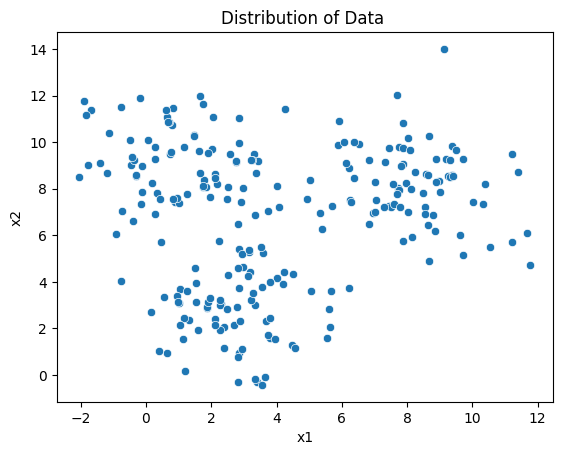

In [7]:
plt.title("Distribution of Data " )
sns.scatterplot(x='x1',y='x2',data = df)

Now we will take k as 3

In [8]:
# Randomly Select points to intialize as a centroid
random_integer = np.random.randint(0,df.shape[0],3)
random_integer

array([107,  85,  79], dtype=int32)

In [9]:
newdf = df.iloc[random_integer]
newdf

,x1,x2
107,3.681112,2.314833
85,1.605400,1.926474
79,8.500409,7.819663


<Axes: title={'center': 'Data distribution (with Initial Centroids)'}, xlabel='x1', ylabel='x2'>

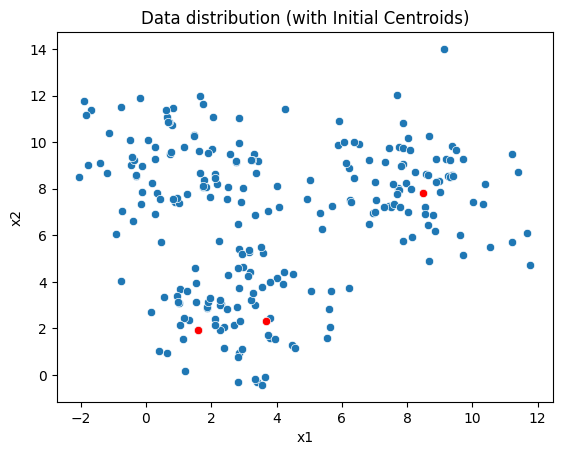

In [10]:
plt.title("Data distribution (with Initial Centroids)")
sns.scatterplot(data=df,x='x1',y='x2')
sns.scatterplot(data=newdf,x='x1',y='x2',color='red')

In [11]:
df.iloc[1].values

array([ 3.40162756, -0.30056247])

In [32]:
# clustring loop
for i in range(0,df.shape[0]):
  distances_list = []
  for j in range(0,newdf.shape[0]):
    distance = np.linalg.norm(newdf.iloc[j].values-df.iloc[i,0:2].values)
    distances_list.append(distance)

  #assigning clusters
  min_arg = np.argmin(distances_list)
  df.loc[i,'label'] = min_arg


for i in range(newdf.shape[0]):
  cluster_points = df[df['label'] == i].iloc[:, 0:2].values
  new_centroid = np.mean(cluster_points, axis=0)
  newdf.iloc[i] = new_centroid



C:\Users\Brothers\AppData\Local\Temp\ipykernel_14452\2079225735.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.iloc[i] = new_centroid


In [33]:
df['label'].value_counts()

label
2.0    81
1.0    81
0.0    78
Name: count, dtype: int64

In [34]:
df.head()

,x1,x2,label
0,3.645289,-0.096719,0.0
1,3.401628,-0.300562,0.0
2,8.582368,8.642753,2.0
3,7.733968,8.030360,2.0
4,9.128052,14.001229,2.0


<Axes: xlabel='x1', ylabel='x2'>

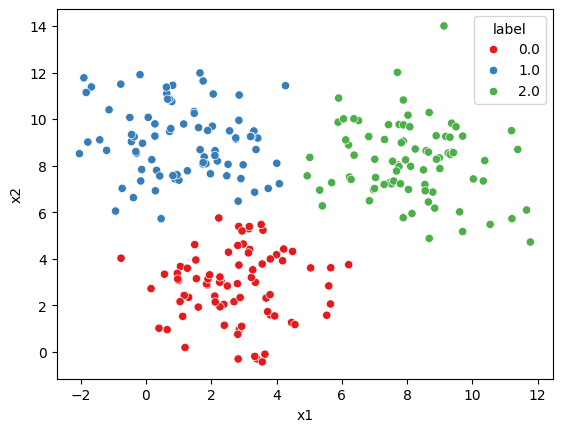

In [35]:

sns.scatterplot(data=df,x='x1',y='x2',hue='label',palette='Set1')

In [16]:
print(f"centers of centroids are {newdf}")

centers of centroids are            x1        x2
107  3.384567  4.281080
85   0.638109  5.620132
79   6.474933  8.684173


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.iloc[:,0:2])

KMeans(n_clusters=3)

In [18]:
kmeans.cluster_centers_

array([[2.75740861, 2.84063084],
       [1.11322045, 9.03461829],
       [8.12555316, 8.17660462]])

In [19]:
predicted_labels = kmeans.fit_predict(df,df.iloc[:,0:2])

<Axes: xlabel='x1', ylabel='x2'>

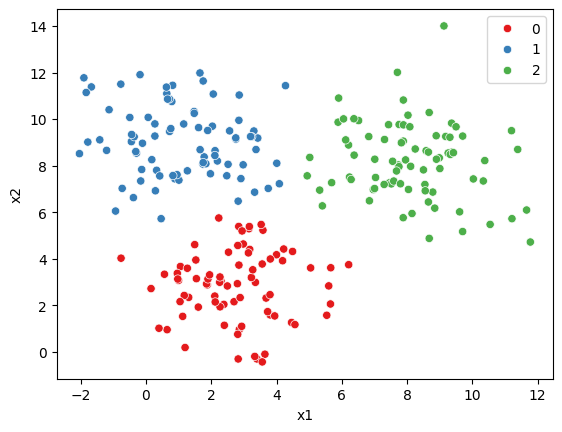

In [20]:
sns.scatterplot(data=df,x='x1',y='x2',hue=predicted_labels,palette='Set1')